# Week 8 & 9 | Machine Learning

- Let's try this out to see if this works well for taking notes! I bet it'll be better for showing code.
- There is __classification__ and __prediction__
- probably more than 4 features
- too specific question

## Questions

Q. what does "__one hot encode__" mean?

A. Taking categorical variables, pivoting to binary T/F for each of them 

Notes:
- split datasets into features and targets

- ```data.drop(columns = ['col1', 'col2'])``` to remove columns of data


__Scikit-learn__ is the standard of ML
  - We never load the whole package. Grab what we need. 
  - train_test_split:
  - [ ] check out the reading assignments
  - ```shuffle``` is a default argument. or ```random_state```
  - Subtle difference: random state is like what set.seed does. With Shuffle, it's the order of the data which may be biast. 
  - methods quiz used 76



In [2]:
# Libraries
import pandas as pd
import altair as alt
import numpy as np

denver_dwelling = pd.read_csv("https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_ml/dwellings_ml.csv")
dwellings_ml = pd.read_csv("https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_ml/dwellings_ml.csv")

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
dwellings_ml.columns

Index(['parcel', 'abstrprd', 'livearea', 'finbsmnt', 'basement', 'yrbuilt',
       'totunits', 'stories', 'nocars', 'numbdrm', 'numbaths', 'sprice',
       'deduct', 'netprice', 'tasp', 'smonth', 'syear', 'condition_AVG',
       'condition_Excel', 'condition_Fair', 'condition_Good',
       'condition_VGood', 'quality_A', 'quality_B', 'quality_C', 'quality_D',
       'quality_X', 'gartype_Att', 'gartype_Att/Det', 'gartype_CP',
       'gartype_Det', 'gartype_None', 'gartype_att/CP', 'gartype_det/CP',
       'arcstyle_BI-LEVEL', 'arcstyle_CONVERSIONS', 'arcstyle_END UNIT',
       'arcstyle_MIDDLE UNIT', 'arcstyle_ONE AND HALF-STORY',
       'arcstyle_ONE-STORY', 'arcstyle_SPLIT LEVEL', 'arcstyle_THREE-STORY',
       'arcstyle_TRI-LEVEL', 'arcstyle_TRI-LEVEL WITH BASEMENT',
       'arcstyle_TWO AND HALF-STORY', 'arcstyle_TWO-STORY', 'qualified_Q',
       'qualified_U', 'status_I', 'status_V', 'before1980'],
      dtype='object')

In [4]:
denver_dwelling.columns

Index(['parcel', 'abstrprd', 'livearea', 'finbsmnt', 'basement', 'yrbuilt',
       'totunits', 'stories', 'nocars', 'numbdrm', 'numbaths', 'sprice',
       'deduct', 'netprice', 'tasp', 'smonth', 'syear', 'condition_AVG',
       'condition_Excel', 'condition_Fair', 'condition_Good',
       'condition_VGood', 'quality_A', 'quality_B', 'quality_C', 'quality_D',
       'quality_X', 'gartype_Att', 'gartype_Att/Det', 'gartype_CP',
       'gartype_Det', 'gartype_None', 'gartype_att/CP', 'gartype_det/CP',
       'arcstyle_BI-LEVEL', 'arcstyle_CONVERSIONS', 'arcstyle_END UNIT',
       'arcstyle_MIDDLE UNIT', 'arcstyle_ONE AND HALF-STORY',
       'arcstyle_ONE-STORY', 'arcstyle_SPLIT LEVEL', 'arcstyle_THREE-STORY',
       'arcstyle_TRI-LEVEL', 'arcstyle_TRI-LEVEL WITH BASEMENT',
       'arcstyle_TWO AND HALF-STORY', 'arcstyle_TWO-STORY', 'qualified_Q',
       'qualified_U', 'status_I', 'status_V', 'before1980'],
      dtype='object')

# Week 8 Thursday Class

In [5]:
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [6]:
# "X" or "independent"
features = dwellings_ml.drop(columns = ['before1980', 'yrbuilt','parcel'])

# "y" or "dependent" or "outcome"
targets = dwellings_ml.before1980

# split the data!
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = .34, random_state = 76)

In [7]:
# create the model
classifier = GaussianNB()

# train the model
classifier.fit(x_train, y_train)

# make predictions
y_predicted = classifier.predict(x_test)

# evaluate model (see how good the model is)
metrics.accuracy_score(y_test, y_predicted)

0.6696187909125915

# Week 9 Tuesday Code

Steps from Gaussian classification model:
- create the instance
- train/fit


Three things to try to up accuracy:
- change variable used in features/x data
  - dropping or adding variables
- type of model
  - decision tree
  - gaussian
- tune the parameters of model

In [8]:
#  kitchen sink approach
features = dwellings_ml.drop(columns = ['before1980', 'yrbuilt', 'parcel'])

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 3, random_state = 24601)
# x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = .34, random_state = 76)

In [9]:
# create the model
classifier_DT = DecisionTreeClassifier(max_depth = 5)

# train the model
classifier_DT.fit(x_train, y_train)

# make predictions
y_predicted = classifier.predict(x_test)

# evaluate model (see how good the model is)
metrics.accuracy_score(y_test, y_predicted)

0.6666666666666666

In [10]:
# Look at the "feature importance". Aka, how important the model thinks the variables are.

feature_df = pd.DataFrame({'features':features.columns, 'importance':classifier_DT.feature_importances_}).sort_values('importance', ascending = False)
feature_df

,features,importance
37,arcstyle_ONE-STORY,0.409669
25,gartype_Att,0.199443
22,quality_C,0.186247
5,stories,0.053382
46,status_I,0.033671
0,abstrprd,0.026946
1,livearea,0.020939
6,nocars,0.014972
15,condition_AVG,0.014283
7,numbdrm,0.012972


In [11]:
(
    alt.Chart(feature_df)
    .mark_bar()
    .encode(
        y = alt.Y('features', sort = '-x'), 
        x = 'importance'
        )
)

alt.Chart(...)

In [12]:
# CoNfUsIoN Matrix
# think False positives and false negatives. Type 1 and type two errors

# metrics.

# balanced accuracy! 




Methods to measure success in models:
- accuracy
- balanced accuracy
- recall
- precision

The _correct_ one depends on the scenario

### Code from Tuesday

In [13]:
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
# create a classification model
classifier_DT = DecisionTreeClassifier(max_depth=33)

# train the model
classifier_DT.fit(x_train, y_train)

# use your model to make predictions!
y_predicted = classifier_DT.predict(x_test)

# test how accurate those predictions are
metrics.accuracy_score(y_test, y_predicted)

0.6666666666666666

## Grand Question 1 
Create 2-3 charts that evaluate potential relationships between the house variables and the variable before1980 Explain what you learn from the charts that could help a machine learning algorithm.



In [15]:
dwellings_ml.columns

Index(['parcel', 'abstrprd', 'livearea', 'finbsmnt', 'basement', 'yrbuilt',
       'totunits', 'stories', 'nocars', 'numbdrm', 'numbaths', 'sprice',
       'deduct', 'netprice', 'tasp', 'smonth', 'syear', 'condition_AVG',
       'condition_Excel', 'condition_Fair', 'condition_Good',
       'condition_VGood', 'quality_A', 'quality_B', 'quality_C', 'quality_D',
       'quality_X', 'gartype_Att', 'gartype_Att/Det', 'gartype_CP',
       'gartype_Det', 'gartype_None', 'gartype_att/CP', 'gartype_det/CP',
       'arcstyle_BI-LEVEL', 'arcstyle_CONVERSIONS', 'arcstyle_END UNIT',
       'arcstyle_MIDDLE UNIT', 'arcstyle_ONE AND HALF-STORY',
       'arcstyle_ONE-STORY', 'arcstyle_SPLIT LEVEL', 'arcstyle_THREE-STORY',
       'arcstyle_TRI-LEVEL', 'arcstyle_TRI-LEVEL WITH BASEMENT',
       'arcstyle_TWO AND HALF-STORY', 'arcstyle_TWO-STORY', 'qualified_Q',
       'qualified_U', 'status_I', 'status_V', 'before1980'],
      dtype='object')

In [16]:
# year column and something else
(
    alt.Chart(dwellings_ml)
    .mark_boxplot()
    .encode(
        y = alt.Y('yrbuilt:Q', 
        scale=alt.Scale(domain=[1800, 2020])
        ), 
        x = alt.X('arcstyle_ONE AND HALF-STORY:O')
        # , color = "before1980:O"
        )
)

alt.Chart(...)

In [17]:
dwellings_ml.columns

Index(['parcel', 'abstrprd', 'livearea', 'finbsmnt', 'basement', 'yrbuilt',
       'totunits', 'stories', 'nocars', 'numbdrm', 'numbaths', 'sprice',
       'deduct', 'netprice', 'tasp', 'smonth', 'syear', 'condition_AVG',
       'condition_Excel', 'condition_Fair', 'condition_Good',
       'condition_VGood', 'quality_A', 'quality_B', 'quality_C', 'quality_D',
       'quality_X', 'gartype_Att', 'gartype_Att/Det', 'gartype_CP',
       'gartype_Det', 'gartype_None', 'gartype_att/CP', 'gartype_det/CP',
       'arcstyle_BI-LEVEL', 'arcstyle_CONVERSIONS', 'arcstyle_END UNIT',
       'arcstyle_MIDDLE UNIT', 'arcstyle_ONE AND HALF-STORY',
       'arcstyle_ONE-STORY', 'arcstyle_SPLIT LEVEL', 'arcstyle_THREE-STORY',
       'arcstyle_TRI-LEVEL', 'arcstyle_TRI-LEVEL WITH BASEMENT',
       'arcstyle_TWO AND HALF-STORY', 'arcstyle_TWO-STORY', 'qualified_Q',
       'qualified_U', 'status_I', 'status_V', 'before1980'],
      dtype='object')

In [18]:
# year column and something else

(
    alt.Chart(dwellings_ml)
    .mark_boxplot()
    .encode(
        y = alt.Y('yrbuilt:Q', 
        scale=alt.Scale(domain=[1850, 2020])
        ), # zoom into the revelant years
        x = alt.X('arcstyle_SPLIT LEVEL:O')
        # , color = "before1980:O"
        )
)

alt.Chart(...)

In [19]:
(
    alt.Chart(dwellings_ml)
    .mark_boxplot()
    .encode(
        y = alt.Y('yrbuilt:Q', 
        scale=alt.Scale(domain=[1850, 2020])
        ), # zoom into the revelant years
        x = alt.X('condition_AVG:O')
        # , color = "before1980:O"
        )
)

alt.Chart(...)

## Grand Question 2
Build a classification model labeling houses as being built “before 1980” or “during or after 1980”. Your goal is to reach 90% accuracy. Explain your final model choice (algorithm, tuning parameters, etc) and describe what other models you tried.




In [20]:
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost



In [21]:
# "X" or "independent"
features = dwellings_ml.drop(columns = ['before1980', 'yrbuilt','parcel'])

# "y" or "dependent" or "outcome"
targets = dwellings_ml.before1980
# targets must already be boolean (classification type)


# split the data!
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = .20, random_state = 76)



In [22]:
classifier_DT = RandomForestClassifier(max_depth=30) #create a classification model
 # I fear that this is over fitting. How can I check for this?
# classifier_DT = DecisionClassifier(max_depth=10)

# train the model
classifier_DT.fit(x_train, y_train)

# use your model to make predictions!
y_predicted = classifier_DT.predict(x_test)


# test how accurate those predictions are
metrics.accuracy_score(y_test, y_predicted)

0.921448832642374

I opted to do a random forest model. I have the training data set at 80% and the test data at 20%. The max depth of the model is at 10 which gives us 90% accuracy. 

## Grand Question 3 
Justify your classification model by discussing the most important features selected by your model. This discussion should include a chart and a description of the features.




<AxesSubplot:>

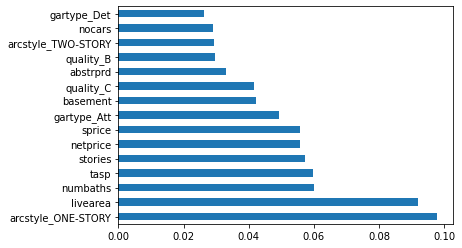

In [23]:
feat_importances = pd.Series(
    classifier_DT
    .feature_importances_, index=x_test
    .columns
)

significance_graph = (
    feat_importances
    .nlargest(15)
    .plot(kind='barh')
)
significance_graph

In [24]:
feature_df = pd.DataFrame({'features':features.columns, 'importance':classifier_DT.feature_importances_})

feature_importance = feature_df.sort_values('importance', ascending = False).head()

print(feature_importance.to_markdown())

|    | features           |   importance |
|---:|:-------------------|-------------:|
| 37 | arcstyle_ONE-STORY |    0.0979053 |
|  1 | livearea           |    0.0918666 |
|  8 | numbaths           |    0.0599002 |
| 12 | tasp               |    0.0598872 |
|  5 | stories            |    0.0573116 |


Shown above are the five most useful features of the model. The first two are related and that may cause issues but we know that we can choose one of them. The quality of the house (feature number three) is something humans would think are significant, and that is considered in the model. Having a garage is also considered significant. Living area, which is another no-brainer of a factor, is considered. 

In [25]:
gq2chart = (
alt.Chart(feature_importance)
.mark_bar()
.encode(
    x = alt.X("features:O", sort = "-y"),
    y = alt.Y("importance:Q")
))

gq2chart

alt.Chart(...)

## Grand Question 4
Describe the quality of your classification model using 2-3 different evaluation metrics. You also need to explain how to interpret each of the evaluation metrics you use.



For evaluating model performance, there is accuracy, precision, and recall.  

Recall often the most important

Formulas: 
- Accuracy: (number of correct responses) / (total number of test cases)
- Recall: (number of true positives) / (number of true positives + number of false negatives)
- Precision: (number of true positives) / (number of true positives + number of false positives)


[Fantastic Website to learn about machine learning evaluation metrics](https://ranvir.xyz/blog/how-to-evaluate-your-machine-learning-model-like-a-pro-metrics/#accuracy)

**0. How Accurate is Your Model?**

- What should be the answer to this question?


**1. What is the process of evaluating your model?**

- Starting with the original dataset, split into training data (80%) and test data (20%). 
- With the *training data*, put through a ML model of choice to train the model
- After the model is trained, then the prediction result arrives. 
    - What is this one exactly? Just having the prediction?
- With *test data*, compare it to the training data's prediction result, then evaluate (which is the point of this article).
    - Compare the test data to a prediction result? How exactly? Isn't that a number compared to a dataset?

![](ML Diagram.png)


- ?Evaluating a model is applying the linear regression model to unseen data?


**2. Why do we need to evaluate our model?**
- Evaluating a model is useful for those who don't speak tech
- There is no perfect way of measuring the success of the model
- Rule of thumb, play it safe when this decision counts
- In the case of diagnosing cancer, we would rather tell the person that they have when they don't than tell the person they don't have cancer when they really do.


**3. Supervised learning and classification problems.**
- **Supervised learning** are problems where the outcomes of the model are already known
    - A model is given a target (a Y variable) and it's task is to find patterns that help it detect what that target will be. 
    - It is then given that 20% of the data is hasn't seen to test it's self on how correct it's attempt was. 
- **Classification Problems** are a subset of supervised learning where the outcomes are divided into two or more parts; whether a person is having cancer or not

- Both models can be evaluated on the following parameters _____??

**3a. Test-Train-Split Using sklearn**
- the general idea of this in code is to: 
    - **Grab the train_test_split function**: from sklearn.model_selection import train_test_split
    - **read in data**: df = pd.read_csv('dataset')
    - **Define features, otherwise known as X variables**: X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
    - **Define the target, otherwise known as the Y variable**: y = df['Yearly Amount Spent']
    - **Split the data into four subsets**: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        - why four and not two?

**4. Accuracy**
- Accuracy is basically a score on a homework assignment or a test
- it is the number of correct responses divided by the total number of test cases
- insert MD fraction here
- Pros:
    - Easily understandable
- Cons: 
    - this type of evaluation is not the best thing to use when the data available is unbalanced
        - is this when the confusion matrix is unbalenced somehow?
- To calculate accuracy: (I adapted the following code from other metrics of success code. It probably follow the same pattern but check it later to be safe)
    - from sklearn.metrics import accuracy_score 
    - recall=accuracy_score(y_true,y_pred,average='binary')

- This paragraph is currently unclear: 
    - "We first calculate the predictions corresponding to the given X_test, finally, we compare these predictions with the y_test which are the real outcomes to the corresponding parameters."

**5. Recall**
- Recall is the ability of your model to find all the relevant cases in your model
- I think this one is used when data is impalanced
- the formula is the number of true positives divided by the number of true positives plus the number of false negatives
- Recall often is used in tandum with the value of precision to ultimately measure the success. 
- "How many of the true positives were recalled (found)?
- This metric is focused on actual positives


**6. Precision**
- Ability of a model to identify only the relevant data points
- "How many of the returned hots were true positives."
- This metric is focused on predicted positives


**7. Accuracy and Recall using Venn Diagram**



**8. Accuracy vs Recall using Example.**



**9. F1-score**



**10. Confusion matrix**



**11. Evaluating for regression problems**



**12. Mean Absolute Error**



**13. Mean Square Error**



**14. Root Mean Square Error**



**15. What is considered as a good metric value for your model?**





In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predicted)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=["True Negatives", "False Positives"]).reset_index()
confusion_matrix_df

# true_negative = confusion_matrix_df.query('index')
# false_positive = 
# false_negative = 
# true_positive = 

,index,True Negatives,False Positives
0,0,1520,191
1,1,169,2703


In [27]:
# # this one might be easier to read
# print(pd.crosstab(
#             y_test.flatten(), 
#             y_predicted, 
#             rownames=['True'], 
#             colnames=['Predicted'], 
#             margins=True)
# )

# # visualize a confusion matrix
# # requires 'matplotlib' to be installed
# metrics.plot_confusion_matrix(classifier_DT, 
#                               x_test, 
#                               y_test)

In [28]:
# Accuracy Score 

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, classifier_DT.predict(x_test))
accuracy

0.921448832642374

In [29]:
# Recall Score
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_predicted, average='binary')
recall

0.9411559888579387

In [30]:
# Precision Score

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_predicted, average='binary')
precision

0.9340013821700069

In [31]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, y_predicted)
print(classification_report)
# classification_report.pd.dataframe()

# classification_report_df = pd.DataFrame(classification_report, columns=["", "", "", "", "", ""]).reset_index()
# classification_report_df

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1711
           1       0.93      0.94      0.94      2872

    accuracy                           0.92      4583
   macro avg       0.92      0.91      0.92      4583
weighted avg       0.92      0.92      0.92      4583

